<a href="https://colab.research.google.com/github/harunme3/hepatitis/blob/main/hepatitis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy as scp


In [97]:
data = pd.read_csv('/hepatitis_csv.csv')


In [98]:
data.shape

(155, 20)

In [99]:
data.head()


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [42]:
data.dtypes

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [101]:

replacements = {'no': 0,
               'yes': 1,
               'die': 0,
               'live': 1,
               '?': np.nan,
               'female': 0,
               'male': 1}

data.replace(replacements, inplace = True)

In [102]:
numerical_variables = ['age', 'bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot']
data[numerical_variables].describe()

,age,bilirubin,protime,albumin,alk_phosphate,sgot
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


In [103]:
categorical_variables = ['sex' , 'steroid', 'antivirals', 'fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable',
'spiders','ascites','varices', 'histology']
data[categorical_variables].apply(pd.Series.value_counts)

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0,139,76,131,54,93,122,25,84,120,99,130,132,85
False,139,76,131,54,93,122,25,84,120,99,130,132,85
1,16,78,24,100,61,32,120,60,30,51,20,18,70
True,16,78,24,100,61,32,120,60,30,51,20,18,70


In [104]:
data.groupby('sex')['bilirubin'].sum()

sex
0    193.0
1     19.7
Name: bilirubin, dtype: float64

In [93]:

hepatitis_analysis = data.dropna()
interesting_values_x = ['albumin', 'anorexia', 'protime', 'sgot', 'class','alk_phosphate', 'ascites', 'bilirubin',]
hepatitis_analysis = hepatitis_analysis[interesting_values_x]
hepatitis_analysis.head()

,albumin,anorexia,protime,sgot,class,alk_phosphate,ascites,bilirubin
5,4.0,False,75.0,28.0,live,95.0,False,0.9
10,4.4,False,85.0,30.0,live,78.0,False,1.3
11,3.7,False,54.0,249.0,live,59.0,False,1.0
12,3.9,False,52.0,60.0,live,81.0,False,0.9
13,4.9,False,78.0,144.0,live,57.0,False,2.2


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


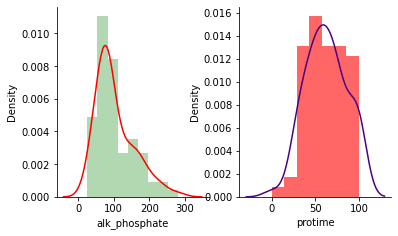

In [105]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['alk_phosphate'],
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"green","alpha":0.3})
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['protime'],
            kde_kws={"color":"indigo","lw":1.5,"alpha":0.8},
            hist_kws={"color":"red","alpha":0.6})
sns.despine();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


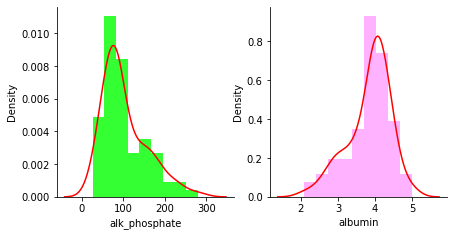

In [106]:

plt.figure(figsize=(7,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['alk_phosphate'],
             kde_kws={"color":"Red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"Lime","alpha":0.8})
sns.despine()
plt.subplot(1, 2, 2)
sns.distplot(hepatitis_analysis['albumin'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.8},
             hist_kws={"color":"Magenta","alpha":0.3})
sns.despine();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


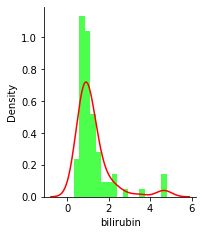

In [107]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['bilirubin'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.5},
             hist_kws={"color":"Lime","alpha":0.7})
sns.despine();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


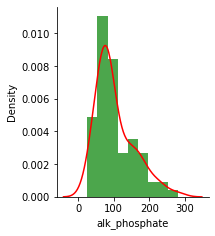

In [108]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['alk_phosphate'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.5},
             hist_kws={"color":"green","alpha":0.7})
sns.despine();

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


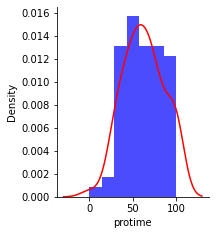

In [109]:
plt.figure(figsize=(6,3.5))
plt.subplot(1, 2, 1)
sns.distplot(hepatitis_analysis['protime'], 
             kde_kws={"color":"red","lw":1.5,"alpha":0.5},
             hist_kws={"color":"Blue","alpha":0.7})
sns.despine();

In [68]:
hepatitis_analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] = hepatitis_analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']].applymap(np.log)
hepatitis_analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,1.386294,False,4.553877,False,-0.105361,75.0,3.332205,live
10,1.481605,False,4.356709,False,0.262364,85.0,3.401197,live
11,1.308333,False,4.077537,False,0.000000,54.0,5.517453,live
12,1.360977,False,4.394449,False,-0.105361,52.0,4.094345,live
13,1.589235,False,4.043051,False,0.788457,78.0,4.969813,live


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


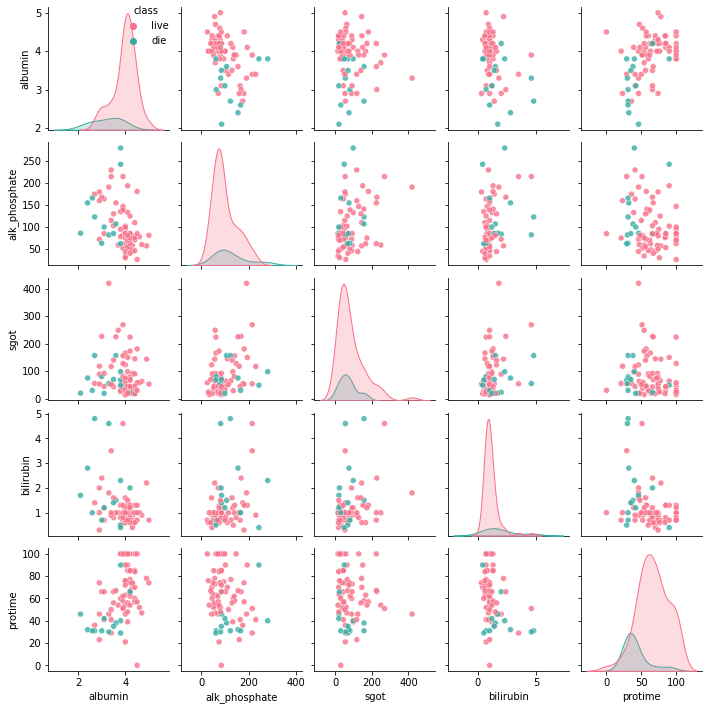

In [110]:
g = sns.pairplot(hepatitis_analysis, x_vars = [ 'albumin', 'alk_phosphate', 'sgot','bilirubin', 'protime',], 
               y_vars = [ 'albumin', 'alk_phosphate', 'sgot','bilirubin', 'protime',], 
               hue = 'class', 
               kind= 'scatter',
               palette = 'husl',
               size = 2,
               plot_kws={"s": 35, "alpha": 0.8})
g.fig.get_children()[-1].set_bbox_to_anchor((0.05, 0.9, 0.18, 0.1));